# Spam detection using a multi-layer perceptron

#### **Import libraries**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, f1_score, recall_score

#### **Data Loading**

In [17]:
df = pd.read_csv('emails.csv')
df.shape

(450, 2)

In [18]:
df.head() 

,email,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   450 non-null    object
 1   spam    450 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
X = df['email']

In [21]:
Y = df['spam']

#### **Data Cleaning**

In [22]:
df.isnull().sum()

email    0
spam     0
dtype: int64

In [23]:
df.drop_duplicates(inplace=True)

#### **Data Visualization**

In [24]:
Y.value_counts()

spam
0    226
1    224
Name: count, dtype: int64

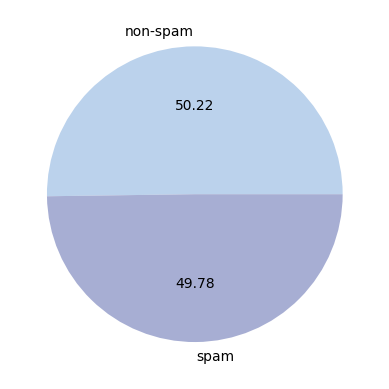

In [25]:
colors = ['#BBD2EC', '#A7AED3']
plt.pie(Y.value_counts(), labels=['non-spam','spam'], autopct="%0.2f", colors=colors)
plt.show()
#plt.savefig("spam.png")

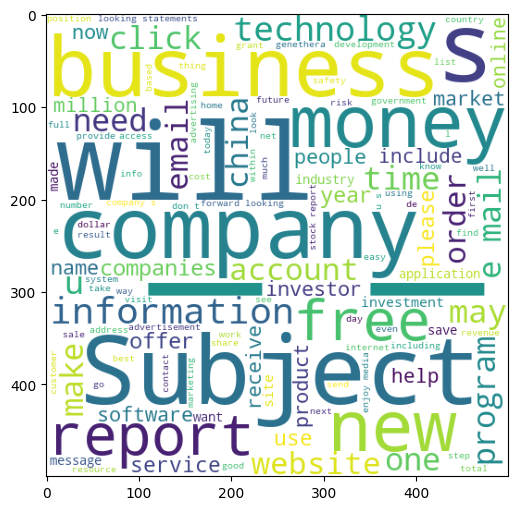

In [26]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_words = wc.generate(df[Y == 1]['email'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_words)
#plt.savefig("spam_words.png")

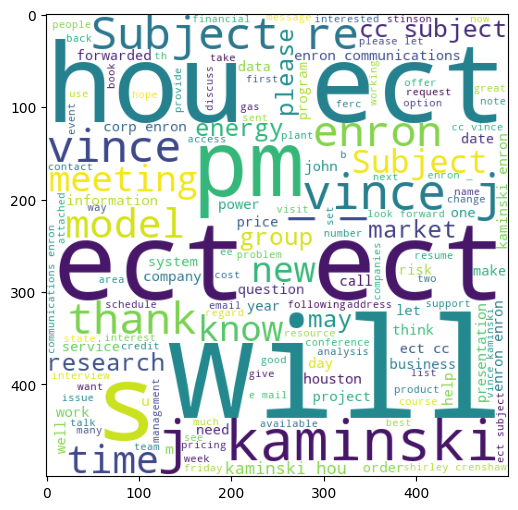

In [27]:
non_spam_words = wc.generate(df[Y == 0]['email'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(non_spam_words)
#plt.savefig("non_spam_words.png")

#### **TF-IDF matrix**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_df=0.8) # ignore terms that appear in more than 80% of the documents
message = tf.fit_transform(X)

In [29]:
tf.get_feature_names_out()

array(['00', '000', '0000', ..., 'zwlaszcza', 'zxghlajf', 'zzzz'],
      dtype=object)

#### **CountVectorizer**

In [30]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer()
# message = cv.fit_transform(X)
# cv.get_feature_names_out()

#### **Data Splitting** (test and train)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(message, Y, test_size=0.20, random_state=0)

#### **MLP**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [33]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=100, kernel_regularizer= regularizers.L1(l1=1e-5), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1126800   
                                                                 
 dense_5 (Dense)             (None, 64)                6464      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1141713 (4.36 MB)
Trainable params: 1141713 (4.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train.toarray(), y_train, batch_size=64, epochs=40, verbose=1, validation_split=0.2)

Epoch 1/40
5/5 [==============================] - 1s 77ms/step - loss: 0.8083 - accuracy: 0.6007 - val_loss: 0.7792 - val_accuracy: 0.9583
Epoch 2/40
5/5 [==============================] - 0s 32ms/step - loss: 0.7555 - accuracy: 0.9931 - val_loss: 0.7218 - val_accuracy: 0.9306
Epoch 3/40
5/5 [==============================] - 0s 33ms/step - loss: 0.6777 - accuracy: 1.0000 - val_loss: 0.6405 - val_accuracy: 0.9444
Epoch 4/40
5/5 [==============================] - 0s 33ms/step - loss: 0.5589 - accuracy: 1.0000 - val_loss: 0.5257 - val_accuracy: 0.9583
Epoch 5/40
5/5 [==============================] - 0s 32ms/step - loss: 0.3988 - accuracy: 1.0000 - val_loss: 0.3923 - val_accuracy: 0.9583
Epoch 6/40
5/5 [==============================] - 0s 31ms/step - loss: 0.2367 - accuracy: 1.0000 - val_loss: 0.2749 - val_accuracy: 0.9722
Epoch 7/40
5/5 [==============================] - 0s 31ms/step - loss: 0.1254 - accuracy: 1.0000 - val_loss: 0.1956 - val_accuracy: 0.9861
Epoch 8/40
5/5 [===========

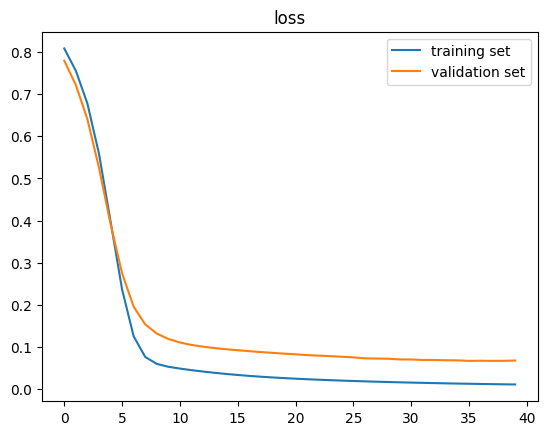

In [37]:
epochs = history.epoch
plt.plot(epochs, history.history['loss'], label="training set") # blue
plt.plot(epochs, history.history['val_loss'], label="validation set") #orange
plt.title('loss')
plt.legend()
plt.savefig("loss.png")

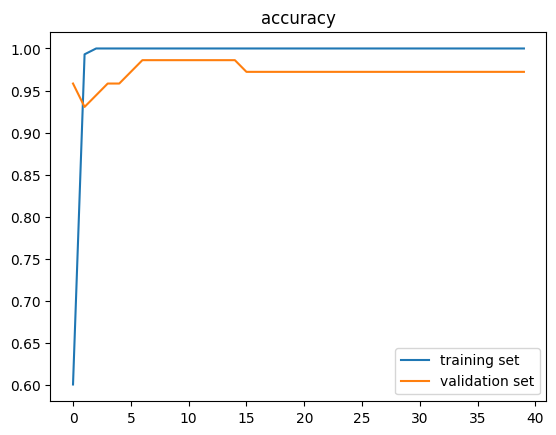

In [38]:
plt.plot(epochs, history.history['accuracy'], label="training set") #blue
plt.plot(epochs, history.history['val_accuracy'], label="validation set") #orange
plt.title('accuracy')
plt.savefig("accuracy.png")
plt.legend()

In [39]:
model.evaluate(X_test.toarray(), y_test, batch_size=64)

2/2 [==============================] - 0s 8ms/step - loss: 0.1436 - accuracy: 0.9556


[0.14364376664161682, 0.9555555582046509]

In [40]:
y_pred = model.predict(X_test.toarray())

3/3 [==============================] - 0s 4ms/step


#### **Metrics**

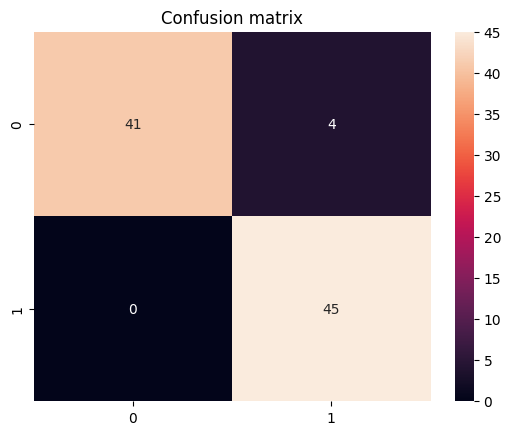

In [41]:
import seaborn as sns

y_pred_new = [int(not(i<0.5)) for i in y_pred]

cm=confusion_matrix(y_test, y_pred_new)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [42]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.92      1.00      0.96        45

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [43]:
precision_score(y_test, y_pred_new)

0.9183673469387755

In [46]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred3 = mnb.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred3)*100))
print(classification_report(y_test, y_pred3))

Accuracy: 97.78%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.96      1.00      0.98        45

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(X_train, y_train)
y_pred4 = lr.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred4)*100))
print(classification_report(y_test, y_pred4))

Accuracy: 94.44%
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        45
           1       0.90      1.00      0.95        45

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred5= rfc.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred5)*100))
print(classification_report(y_test, y_pred5))

Accuracy: 92.22%
              precision    recall  f1-score   support

           0       1.00      0.84      0.92        45
           1       0.87      1.00      0.93        45

    accuracy                           0.92        90
   macro avg       0.93      0.92      0.92        90
weighted avg       0.93      0.92      0.92        90



In [53]:
comparation = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred4)*100, f1_score(y_test,y_pred4,average='macro')*100, recall_score(y_test, y_pred4,average='micro')*100, precision_score(y_test, y_pred4,average='micro')*100],
                            'MLP':[accuracy_score(y_test,y_pred_new)*100, f1_score(y_test,y_pred_new,average='macro')*100, recall_score(y_test, y_pred_new,average='micro')*100, precision_score(y_test, y_pred_new,average='micro')*100],
                            'MultinomialNB':[accuracy_score(y_test,y_pred3)*100, f1_score(y_test,y_pred3,average='macro')*100, recall_score(y_test, y_pred3,average='micro')*100, precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred5)*100, f1_score(y_test,y_pred5,average='macro')*100, recall_score(y_test, y_pred5,average='micro')*100, precision_score(y_test, y_pred5,average='micro')*100],
                           

})

comparation.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
comparation.head()

,Logistic Regression,MLP,MultinomialNB,Random Forest
Accuracy,94.444444,95.555556,97.777778,92.222222
F1_score,94.427245,95.546759,97.776680,92.174885
Recall,94.444444,95.555556,97.777778,92.222222
Precision,94.444444,95.555556,97.777778,92.222222
